# Plots

In [2]:
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

import glob
import sys
import torch
# def load_data(path):


In [12]:

# Get all files inside ../results iteratively with .pkl extension
files = glob.glob("../results/**/*.pkl", recursive=True)

# get only tsp50 files
files = [file for file in files if "cvrp50" in file]

print(files)


# Load first file
with open(files[0], "rb") as f:
    data = pickle.load(f)



['../results/eval_methods_pareto/cvrp50/symnco-cvrp50/results.pkl', '../results/eval_methods_pareto/cvrp50/am-cvrp50-sm/results.pkl', '../results/eval_methods_pareto/cvrp50/am-cvrp50/results.pkl', '../results/eval_methods_pareto/cvrp50/pomo-cvrp50/results.pkl', '../results/eval_methods_pareto/cvrp50/am-cvrp50-sm-xl/results.pkl']


In [5]:
# Make plot



experiments = ['greedy', 'augment', 'augment_dihedral_8', 'sampling', 
               'greedy_multistart', 'greedy_multistart_augment_dihedral_8', 
               'greedy_multistart_augment']



data.keys()

dict_keys(['greedy', 'augment', 'augment_dihedral_8', 'sampling', 'greedy_multistart', 'greedy_multistart_augment_dihedral_8', 'greedy_multistart_augment'])

In [6]:
color_scheme = {
    "greedy": "tab:blue",
    "augment": "tab:orange",
    "augment_dihedral_8": "tab:orange",
    "sampling": "tab:green",
    "greedy_multistart": "tab:red",
    "greedy_multistart_augment": "tab:purple",
    "greedy_multistart_augment_dihedral_8": "tab:purple",
}

# marker shape
marker_scheme = {
    "greedy": "o",
    "augment": "o",
    "augment_dihedral_8": "X",
    "sampling": "o",
    "greedy_multistart": "o",
    "greedy_multistart_augment": "o",
    "greedy_multistart_augment_dihedral_8": "X",
}

label_scheme = {
    "greedy": "Greedy",
    "augment": "Augment",
    "augment_dihedral_8": "Augment",
    "sampling": "Sampling",
    "greedy_multistart": "Multistart",
    "greedy_multistart_augment": "Multistart + Augment",
    "greedy_multistart_augment_dihedral_8": "Multistart + Augment"
}


In [7]:
# Make plot with Latex rcparams
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

In [10]:


def optimality_gap(bk_sol, opt_sol):
    return ((bk_sol - opt_sol) / bk_sol).mean().item() * 100


# Concorde
def load_solver_file_tsp(num_nodes):
    solver_path = Path("../solver/tsp")
    solver_files = glob.glob(str(solver_path / "*tsp*.pkl"), recursive=True)
    # load pickle of first solver file
    file_ = solver_path / f"tsp_{num_nodes}.pkl"
    with open(file_, 'rb') as f:
        costs = pickle.load(f)
    print("Concorde time for {} nodes: {:.2f}s".format(num_nodes, costs[0]))
    print("Average cost: {:.4f}".format(sum(costs[1])/len(costs[1])))

    return torch.Tensor(costs[1])



# HGS
def load_solver_file_vrp(num_nodes):

    solver_path = Path("../solver/vrp")

    dir_ = solver_path / f"{num_nodes}_test_seed_1234"

    solver_files = sorted(glob.glob(str(dir_ / "*.txt")))
    # take the interger of file number and order by it
    solver_files = sorted(solver_files, key=lambda x: int(x.split("/")[-1].split(".")[0]))
    costs = []
    for solver_file in solver_files:
        with open(solver_file, "r") as f:
            # get lines as dict
            lines = f.readlines()
            lines = [line.strip().split() for line in lines]
            lines = {line[0]: line[1:] for line in lines}
            costs.append(float(lines['obj_val:'][0]))
    print("Average cost: {:.4f}".format(sum(costs)/len(costs)))
    return torch.Tensor(costs)

costs = load_solver_file_vrp(50)


Average cost: 10.3661


In [27]:
# Get all files inside ../results iteratively with .pkl extension
files = glob.glob("../results/**/*.pkl", recursive=True)

# get only tsp50 files
# files = [file for file in files if "cvrp50" in file]

print(files)

['../results/eval_methods_pareto/cvrp50/symnco-cvrp50/results.pkl', '../results/eval_methods_pareto/cvrp50/am-cvrp50-sm/results.pkl', '../results/eval_methods_pareto/cvrp50/am-cvrp50/results.pkl', '../results/eval_methods_pareto/cvrp50/pomo-cvrp50/results.pkl', '../results/eval_methods_pareto/cvrp50/am-cvrp50-sm-xl/results.pkl', '../results/eval_methods_pareto/tsp20/am-tsp20-sm-xl/results.pkl', '../results/eval_methods_pareto/tsp20/pomo-tsp20/results.pkl', '../results/eval_methods_pareto/tsp20/am-tsp20/results.pkl', '../results/eval_methods_pareto/tsp20/am-sm-tsp20/results.pkl', '../results/eval_methods_pareto/tsp20/symnco-tsp20/results.pkl', '../results/eval_methods_pareto/tsp50/am-tsp50/results.pkl', '../results/eval_methods_pareto/tsp50/am-sm-tsp50/results.pkl', '../results/eval_methods_pareto/tsp50/pomo-tsp50/results.pkl', '../results/eval_methods_pareto/tsp50/am-tsp50-sm-xl/results.pkl', '../results/eval_methods_pareto/tsp50/symnco-tsp50/results.pkl', '../results/eval_methods_pare

## TSP 50

Concorde time for 50 nodes: 1904.55s
Average cost: 5.6960


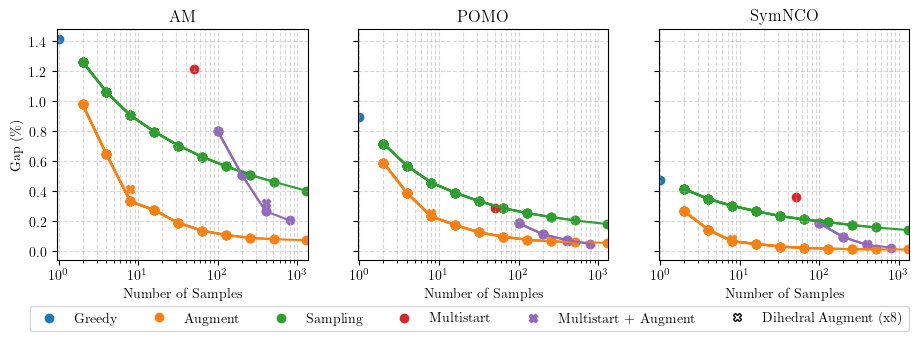

In [52]:

fig, axs = plt.subplots(1, 3, figsize=(11, 3), sharey=True)


### AM-CVRP50
exp_name_ = 'tsp50'



costs = load_solver_file_tsp(50)

# Get file containing am-cvrp50 
f = [file for file in files if f"am-{exp_name_}/" in file]

# Load first file
with open(f[0], "rb") as f_:
    data = pickle.load(f_)




ax = axs[0]
for experiment in experiments:


    x_values = []
    y_values = []

    for exp in data[experiment]:
        
        costs_model = -exp['rewards']
        gap = optimality_gap(costs_model, costs)

        # If greedy, get optimality gap and plot
        if experiment == 'greedy':
            num_samples = 1

        elif experiment == 'augment' or experiment == 'augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment']

        elif experiment == ('greedy_multistart'):
            num_samples = exp['exp_kwargs']['num_starts']

        elif experiment == 'greedy_multistart_augment' or experiment == 'greedy_multistart_augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment'] * exp['exp_kwargs']['num_starts']
        
        elif experiment == 'sampling':
            num_samples = exp['exp_kwargs']['samples']

        else:
            raise ValueError("Experiment not found")
        x_values.append(num_samples)
        y_values.append(gap)

        # ax.scatter(num_samples, gap, label={experiment}, 
        #            color=color_scheme[experiment], marker=marker_scheme[experiment])
        # Sorting values for proper line plot
        sorted_pairs = sorted(zip(x_values, y_values))
        x_values = [pair[0] for pair in sorted_pairs]
        y_values = [pair[1] for pair in sorted_pairs]

        ax.scatter(x_values, y_values,label=label_scheme[experiment] , 
                color=color_scheme[experiment], marker=marker_scheme[experiment])
        ax.plot(x_values, y_values, color=color_scheme[experiment])

# Make nice grid
ax.grid(True, which="both", ls="--", alpha=0.5)

ax.set_xlim(0.95, None)
ax.set_xlabel("Number of Samples")

# Make legend. If multiple values are found, then remove them
handles, labels = ax.get_legend_handles_labels()
# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle



ax.legend(by_label.values(), by_label.keys(), loc='upper right')

ax.set_ylabel("Gap (\%)")
ax.set_xscale('log')

# title
ax.set_title("AM")



### AM-CVRP50


# Get file containing pomo-cvrp50 /
f = [file for file in files if f"pomo-{exp_name_}/" in file]

# Load first file
with open(f[0], "rb") as f_:
    data = pickle.load(f_)




ax = axs[1]
for experiment in experiments:


    x_values = []
    y_values = []

    for exp in data[experiment]:
        
        costs_model = -exp['rewards']
        gap = optimality_gap(costs_model, costs)

        # If greedy, get optimality gap and plot
        if experiment == 'greedy':
            num_samples = 1

        elif experiment == 'augment' or experiment == 'augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment']

        elif experiment == ('greedy_multistart'):
            num_samples = exp['exp_kwargs']['num_starts']

        elif experiment == 'greedy_multistart_augment' or experiment == 'greedy_multistart_augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment'] * exp['exp_kwargs']['num_starts']
        
        elif experiment == 'sampling':
            num_samples = exp['exp_kwargs']['samples']

        else:
            raise ValueError("Experiment not found")
        x_values.append(num_samples)
        y_values.append(gap)

        # ax.scatter(num_samples, gap, label={experiment}, 
        #            color=color_scheme[experiment], marker=marker_scheme[experiment])
        # Sorting values for proper line plot
        sorted_pairs = sorted(zip(x_values, y_values))
        x_values = [pair[0] for pair in sorted_pairs]
        y_values = [pair[1] for pair in sorted_pairs]

        ax.scatter(x_values, y_values,label=label_scheme[experiment] , 
                color=color_scheme[experiment], marker=marker_scheme[experiment])
        ax.plot(x_values, y_values, color=color_scheme[experiment])

# Make nice grid
ax.grid(True, which="both", ls="--", alpha=0.5)

ax.set_xlim(0.95, None)
ax.set_xlabel("Number of Samples")

# Make legend. If multiple values are found, then remove them
handles, labels = ax.get_legend_handles_labels()
# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle


ax.set_title("POMO")

ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# ax.set_ylabel("Gap (\%)")
ax.set_xscale('log')





### AM-CVRP50


# Get file containing symnco-cvrp50 /
f = [file for file in files if f"symnco-{exp_name_}/" in file]

# Load first file
with open(f[0], "rb") as f_:
    data = pickle.load(f_)




ax = axs[2]
for experiment in experiments:


    x_values = []
    y_values = []

    for exp in data[experiment]:
        
        costs_model = -exp['rewards']
        gap = optimality_gap(costs_model, costs)

        # If greedy, get optimality gap and plot
        if experiment == 'greedy':
            num_samples = 1

        elif experiment == 'augment' or experiment == 'augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment']

        elif experiment == ('greedy_multistart'):
            num_samples = exp['exp_kwargs']['num_starts']

        elif experiment == 'greedy_multistart_augment' or experiment == 'greedy_multistart_augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment'] * exp['exp_kwargs']['num_starts']
        
        elif experiment == 'sampling':
            num_samples = exp['exp_kwargs']['samples']

        else:
            raise ValueError("Experiment not found")
        x_values.append(num_samples)
        y_values.append(gap)

        # ax.scatter(num_samples, gap, label={experiment}, 
        #            color=color_scheme[experiment], marker=marker_scheme[experiment])
        # Sorting values for proper line plot
        sorted_pairs = sorted(zip(x_values, y_values))
        x_values = [pair[0] for pair in sorted_pairs]
        y_values = [pair[1] for pair in sorted_pairs]

        ax.scatter(x_values, y_values,label=label_scheme[experiment] , 
                color=color_scheme[experiment], marker=marker_scheme[experiment])
        ax.plot(x_values, y_values, color=color_scheme[experiment])

# Make nice grid
ax.grid(True, which="both", ls="--", alpha=0.5)

ax.set_xlim(0.95, None)
ax.set_xlabel("Number of Samples")

# Make legend. If multiple values are found, then remove them
handles, labels = ax.get_legend_handles_labels()
# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle

ax.set_title("SymNCO")


ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# ax.set_ylabel("Gap (\%)")
ax.set_xscale('log')

# # Get handles and labels for legend
# handles, labels = ax.get_legend_handles_labels()
# # make legend down


# # Remove all legends, and move them to the to
# for ax in axs:
#     ax.legend().remove()

# # remove duplicate labels

handles, labels = axs[0].get_legend_handles_labels()
# filter duplicates
new_handles, new_labels = [], []
for handle, label in zip(handles, labels):
    if label not in new_labels:
        new_handles.append(handle)
        new_labels.append(label)
handles, labels = new_handles, new_labels

# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle



# remove legend from all plots
for ax in axs:
    ax.legend().remove()

fig.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=int(len(labels)+1 ), bbox_to_anchor=(0.5, -0.15))#, prop=legend_font)


# Save figure
plt.savefig(f"plots/pareto_{exp_name_}.pdf", bbox_inches='tight')

Average cost: 10.3661


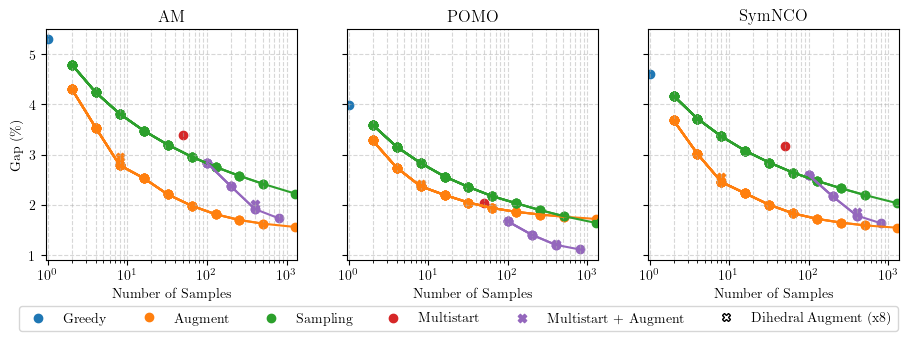

In [53]:

fig, axs = plt.subplots(1, 3, figsize=(11, 3), sharey=True)


### AM-CVRP50
exp_name_ = 'cvrp50'



costs = load_solver_file_vrp(50)

# Get file containing am-cvrp50 
f = [file for file in files if f"am-{exp_name_}/" in file]

# Load first file
with open(f[0], "rb") as f_:
    data = pickle.load(f_)




ax = axs[0]
for experiment in experiments:


    x_values = []
    y_values = []

    for exp in data[experiment]:
        
        costs_model = -exp['rewards']
        gap = optimality_gap(costs_model, costs)

        # If greedy, get optimality gap and plot
        if experiment == 'greedy':
            num_samples = 1

        elif experiment == 'augment' or experiment == 'augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment']

        elif experiment == ('greedy_multistart'):
            num_samples = exp['exp_kwargs']['num_starts']

        elif experiment == 'greedy_multistart_augment' or experiment == 'greedy_multistart_augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment'] * exp['exp_kwargs']['num_starts']
        
        elif experiment == 'sampling':
            num_samples = exp['exp_kwargs']['samples']

        else:
            raise ValueError("Experiment not found")
        x_values.append(num_samples)
        y_values.append(gap)

        # ax.scatter(num_samples, gap, label={experiment}, 
        #            color=color_scheme[experiment], marker=marker_scheme[experiment])
        # Sorting values for proper line plot
        sorted_pairs = sorted(zip(x_values, y_values))
        x_values = [pair[0] for pair in sorted_pairs]
        y_values = [pair[1] for pair in sorted_pairs]

        ax.scatter(x_values, y_values,label=label_scheme[experiment] , 
                color=color_scheme[experiment], marker=marker_scheme[experiment])
        ax.plot(x_values, y_values, color=color_scheme[experiment])

# Make nice grid
ax.grid(True, which="both", ls="--", alpha=0.5)

ax.set_xlim(0.95, None)
ax.set_xlabel("Number of Samples")

# Make legend. If multiple values are found, then remove them
handles, labels = ax.get_legend_handles_labels()
# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle



ax.legend(by_label.values(), by_label.keys(), loc='upper right')

ax.set_ylabel("Gap (\%)")
ax.set_xscale('log')

# title
ax.set_title("AM")



### AM-CVRP50


# Get file containing pomo-cvrp50 /
f = [file for file in files if f"pomo-{exp_name_}/" in file]

# Load first file
with open(f[0], "rb") as f_:
    data = pickle.load(f_)




ax = axs[1]
for experiment in experiments:


    x_values = []
    y_values = []

    for exp in data[experiment]:
        
        costs_model = -exp['rewards']
        gap = optimality_gap(costs_model, costs)

        # If greedy, get optimality gap and plot
        if experiment == 'greedy':
            num_samples = 1

        elif experiment == 'augment' or experiment == 'augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment']

        elif experiment == ('greedy_multistart'):
            num_samples = exp['exp_kwargs']['num_starts']

        elif experiment == 'greedy_multistart_augment' or experiment == 'greedy_multistart_augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment'] * exp['exp_kwargs']['num_starts']
        
        elif experiment == 'sampling':
            num_samples = exp['exp_kwargs']['samples']

        else:
            raise ValueError("Experiment not found")
        x_values.append(num_samples)
        y_values.append(gap)

        # ax.scatter(num_samples, gap, label={experiment}, 
        #            color=color_scheme[experiment], marker=marker_scheme[experiment])
        # Sorting values for proper line plot
        sorted_pairs = sorted(zip(x_values, y_values))
        x_values = [pair[0] for pair in sorted_pairs]
        y_values = [pair[1] for pair in sorted_pairs]

        ax.scatter(x_values, y_values,label=label_scheme[experiment] , 
                color=color_scheme[experiment], marker=marker_scheme[experiment])
        ax.plot(x_values, y_values, color=color_scheme[experiment])

# Make nice grid
ax.grid(True, which="both", ls="--", alpha=0.5)

ax.set_xlim(0.95, None)
ax.set_xlabel("Number of Samples")

# Make legend. If multiple values are found, then remove them
handles, labels = ax.get_legend_handles_labels()
# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle


ax.set_title("POMO")

ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# ax.set_ylabel("Gap (\%)")
ax.set_xscale('log')





### AM-CVRP50


# Get file containing symnco-cvrp50 /
f = [file for file in files if f"symnco-{exp_name_}/" in file]

# Load first file
with open(f[0], "rb") as f_:
    data = pickle.load(f_)




ax = axs[2]
for experiment in experiments:


    x_values = []
    y_values = []

    for exp in data[experiment]:
        
        costs_model = -exp['rewards']
        gap = optimality_gap(costs_model, costs)

        # If greedy, get optimality gap and plot
        if experiment == 'greedy':
            num_samples = 1

        elif experiment == 'augment' or experiment == 'augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment']

        elif experiment == ('greedy_multistart'):
            num_samples = exp['exp_kwargs']['num_starts']

        elif experiment == 'greedy_multistart_augment' or experiment == 'greedy_multistart_augment_dihedral_8':
            num_samples = exp['exp_kwargs']['num_augment'] * exp['exp_kwargs']['num_starts']
        
        elif experiment == 'sampling':
            num_samples = exp['exp_kwargs']['samples']

        else:
            raise ValueError("Experiment not found")
        x_values.append(num_samples)
        y_values.append(gap)

        # ax.scatter(num_samples, gap, label={experiment}, 
        #            color=color_scheme[experiment], marker=marker_scheme[experiment])
        # Sorting values for proper line plot
        sorted_pairs = sorted(zip(x_values, y_values))
        x_values = [pair[0] for pair in sorted_pairs]
        y_values = [pair[1] for pair in sorted_pairs]

        ax.scatter(x_values, y_values,label=label_scheme[experiment] , 
                color=color_scheme[experiment], marker=marker_scheme[experiment])
        ax.plot(x_values, y_values, color=color_scheme[experiment])

# Make nice grid
ax.grid(True, which="both", ls="--", alpha=0.5)

ax.set_xlim(0.95, None)
ax.set_xlabel("Number of Samples")

# Make legend. If multiple values are found, then remove them
handles, labels = ax.get_legend_handles_labels()
# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle

ax.set_title("SymNCO")


ax.legend(by_label.values(), by_label.keys(), loc='upper right')

# ax.set_ylabel("Gap (\%)")
ax.set_xscale('log')

# # Get handles and labels for legend
# handles, labels = ax.get_legend_handles_labels()
# # make legend down


# # Remove all legends, and move them to the to
# for ax in axs:
#     ax.legend().remove()

# # remove duplicate labels

handles, labels = axs[0].get_legend_handles_labels()
# filter duplicates
new_handles, new_labels = [], []
for handle, label in zip(handles, labels):
    if label not in new_labels:
        new_handles.append(handle)
        new_labels.append(label)
handles, labels = new_handles, new_labels

# make line in legend
line_patch = mpatches.FancyBboxPatch((0, 0), 1, 1, fc='white', ec='black', boxstyle='round,pad=0.2')
handles.append(line_patch)
by_label = dict(zip(labels, handles))

new_handle = Line2D([], [], marker='o', linestyle='None', color=color_scheme['augment'])
by_label['Augment'] = new_handle

new_handle = Line2D([], [], marker='X', linestyle='None', 
                    color='black', fillstyle='none')
by_label['Dihedral Augment (x8)'] = new_handle



# remove legend from all plots
for ax in axs:
    ax.legend().remove()

fig.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=int(len(labels)+1 ), bbox_to_anchor=(0.5, -0.15))#, prop=legend_font)


# Save figure
plt.savefig(f"plots/pareto_{exp_name_}.pdf", bbox_inches='tight')